In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from pandas import DataFrame, read_csv

In [120]:
f = "Churn.csv"
df = read_csv(f)
#df.describe

In [121]:
df['tenure'] = pd.cut(df['tenure'], 9, labels=[0, 1, 2,3,4,5,6,7,8])
#df['tenure'] = pd.cut(df['tenure'], 2, labels=[0, 1])

In [122]:
for i in range(len(df)):
    if  df.iloc[i, df.columns.get_loc('MultipleLines')] == 'No':
        df.iloc[i, df.columns.get_loc('PhoneService')] = 'One'
        
    if  df.iloc[i, df.columns.get_loc('MultipleLines')] == 'Yes':
        df.iloc[i, df.columns.get_loc('PhoneService')] = 'Many'

In [123]:
print(df.columns)

print(len(df))

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
7043


In [124]:
#df = df.drop(['customerID','PaperlessBilling','PaymentMethod'], axis = 1)
df = df.drop(['customerID', 'TotalCharges','MultipleLines'], axis = 1)
#idf = idf.drop(['customerID','PaperlessBilling','PaymentMethod', 'TotalCharges','MultipleLines'], axis = 1)
#nidf = nidf.drop(['customerID','PaperlessBilling','PaymentMethod','InternetService','TotalCharges','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'], axis = 1)

In [125]:
df['MonthlyCharges'] = pd.cut(df['MonthlyCharges'], 10, labels=[0, 1, 2,3,4,5,6,7,8,9])

In [126]:
for i in df.columns:
    print(i + ': ' +str(set(df[i]))+'\n')

gender: {'Male', 'Female'}

SeniorCitizen: {0, 1}

Partner: {'Yes', 'No'}

Dependents: {'Yes', 'No'}

tenure: {0, 1, 2, 3, 4, 5, 6, 7, 8}

PhoneService: {'Many', 'No', 'One'}

InternetService: {'Fiber optic', 'No', 'DSL'}

OnlineSecurity: {'No internet service', 'Yes', 'No'}

OnlineBackup: {'No internet service', 'Yes', 'No'}

DeviceProtection: {'No internet service', 'Yes', 'No'}

TechSupport: {'No internet service', 'Yes', 'No'}

StreamingTV: {'No internet service', 'Yes', 'No'}

StreamingMovies: {'No internet service', 'Yes', 'No'}

Contract: {'Month-to-month', 'Two year', 'One year'}

PaperlessBilling: {'Yes', 'No'}

PaymentMethod: {'Credit card (automatic)', 'Electronic check', 'Mailed check', 'Bank transfer (automatic)'}

MonthlyCharges: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Churn: {'Yes', 'No'}



In [129]:
XX = df[df.columns.tolist()[:-1]]#.head(size)
Y = df[df.columns.tolist()[-1]]#.head(size)

In [130]:
X = pd.DataFrame()
for i in list(XX.columns.values):
    X = pd.concat([X,pd.get_dummies(XX[i], prefix=str(i))],axis=1)
    #print(ndf)
X.columns

Index(['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'tenure_0', 'tenure_1', 'tenure_2', 'tenure_3', 'tenure_4', 'tenure_5',
       'tenure_6', 'tenure_7', 'tenure_8', 'PhoneService_Many',
       'PhoneService_No', 'PhoneService_One', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year'

In [131]:
#X = ndf[ndf.columns.tolist()[:-1]]#.head(size)
#Y = ndf[ndf.columns.tolist()[-1]]#.head(size)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size =  0.3, random_state = 42)

labels = np.array(train_y)
features = np.array(train_x)

print(len(X))
print(len(Y))
print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

7043
7043
4930
2113
4930
2113


In [132]:
#RANDOM FOREST
clf = RandomForestClassifier()

In [37]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(train_x)  
train_x = scaler.transform(train_x)  
# apply same transformation to test data
test_x = scaler.transform(test_x) 

features = np.array(train_x)

In [134]:
#LOGISTIC REGRESSION
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5)

In [136]:
#NEURAL NETWORK
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

In [137]:
TrainedModel = clf.fit(features, labels)

predictions = TrainedModel.predict(test_x)

print("Test Accuracy  :: " + str(accuracy_score(test_y, predictions) * 100) + " % ")

Test Accuracy  :: 77.3781353526 % 


In [156]:
conf_arr = confusion_matrix(test_y, predictions)

In [108]:
import matplotlib.pyplot as plt
idf.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
gender,1.0,-0.005,0.027,0.013,0.015,0.0033,-0.011,-0.018,-0.014,0.00023,-0.0086,-0.0073,-0.0099,0.0036,-0.0082
SeniorCitizen,-0.005,1.0,0.018,-0.21,0.0016,-0.11,0.2,-0.11,-0.0036,-0.011,-0.14,0.034,0.05,-0.13,0.12
Partner,0.027,0.018,1.0,0.42,0.38,-0.14,0.00075,0.17,0.17,0.19,0.14,0.16,0.15,0.29,-0.16
Dependents,0.013,-0.21,0.42,1.0,0.17,0.0031,-0.13,0.16,0.098,0.085,0.14,0.054,0.024,0.22,-0.15
tenure,0.015,0.0016,0.38,0.17,1.0,-0.34,0.0023,0.37,0.42,0.42,0.37,0.33,0.33,0.69,-0.4
PhoneService,0.0033,-0.11,-0.14,0.0031,-0.34,1.0,-0.22,-0.048,-0.15,-0.16,-0.051,-0.2,-0.21,-0.16,0.016
InternetService,-0.011,0.2,0.00075,-0.13,0.0023,-0.22,1.0,-0.22,-0.015,-0.0016,-0.21,0.17,0.16,-0.19,0.24
OnlineSecurity,-0.018,-0.11,0.17,0.16,0.37,-0.048,-0.22,1.0,0.18,0.17,0.27,0.044,0.056,0.41,-0.28
OnlineBackup,-0.014,-0.0036,0.17,0.098,0.42,-0.15,-0.015,0.18,1.0,0.19,0.19,0.15,0.14,0.32,-0.2
DeviceProtection,0.00023,-0.011,0.19,0.085,0.42,-0.16,-0.0016,0.17,0.19,1.0,0.24,0.28,0.29,0.4,-0.18


In [163]:
df.groupby('InternetService').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
InternetService,,,,,,,,,,,,,,,,,,,,
DSL,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421
Fiber optic,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096
No,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526


In [173]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

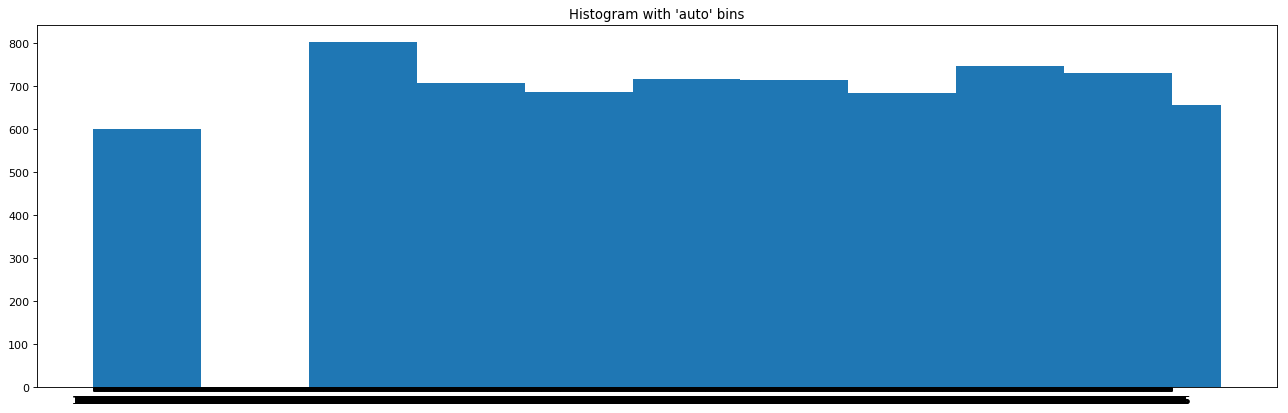

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

plt.hist(df['TotalCharges'], bins=10)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()